# CISC 151: Active Learning 5 

## Introduction

We will be using the iris data set for this Session. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the "data" directory.
"./" usually denotes the current folder that your program or script is in.

In [1]:
from __future__ import print_function
import os
data_path = ['./', 'data']

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [25]:
#To solve all the questions we need to import some libraries. Lets do it here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (12,8)
import seaborn as sns


In [3]:
#Make sure the dataset is in your current working directory.
# If it is not in the current working directory , then you need to change the data_path in cell1


#load the dataset 
data = pd.read_csv('Iris_Data.csv')

#visualize the dataframe 
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Check number of rows and columns using shape
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')


There are 150 rows and 5 columns.


In [5]:
#get the column names and datatypes uisng data.dtypes
#This already prints column names and datatypes, so we don't need to use data.columns separately
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [6]:
#Remove the Iris from specie names usinf str.replace() method
data["species"] = data["species"].str.replace("Iris-", "")
#Check the updated dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [7]:
#Number of each species present
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
#get mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

description = data.describe()

# add a new row called 'range' that shows the range (max-min) of each column
description.loc['range'] = description.loc['max'] - description.loc['min']

print(description)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
range      3.600000     2.400000      5.900000     2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [9]:
#Get the mean of the measurements for each species
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [10]:
#Get the median of  the measurements for each species
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [11]:
#Get both mean and median of  the measurements for each species
data.groupby('species').agg(['mean','median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

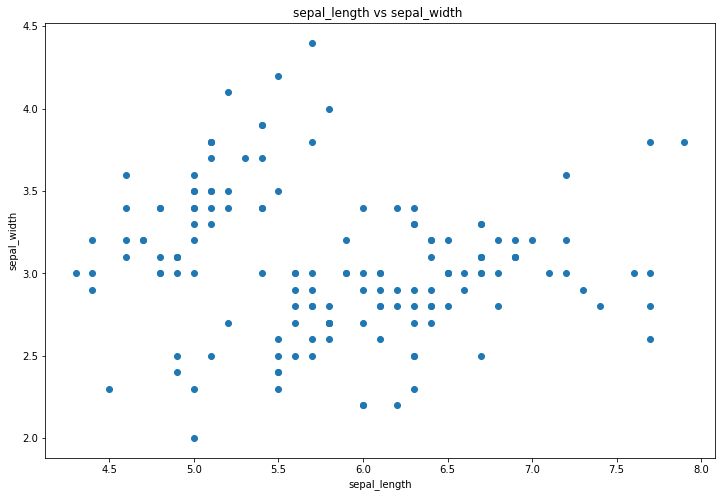

In [26]:
plt.scatter(data['sepal_length'], data['sepal_width'])

# add a title and axis labels
plt.title("sepal_length vs sepal_width ")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

# display the plot
plt.show()

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

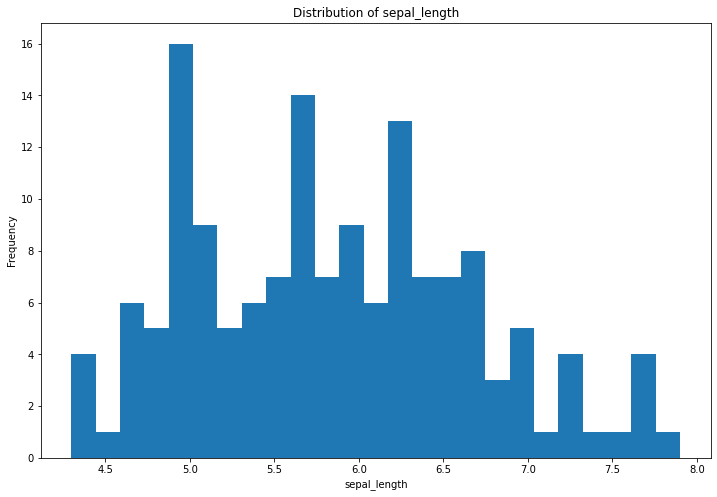

In [27]:
#Lets plot a histogram for sepal_length
plt.hist(data['sepal_length'], bins=25)

# add a title and axis labels
plt.title("Distribution of sepal_length")
plt.xlabel("sepal_length")
plt.ylabel("Frequency")

# display the plot
plt.show()

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

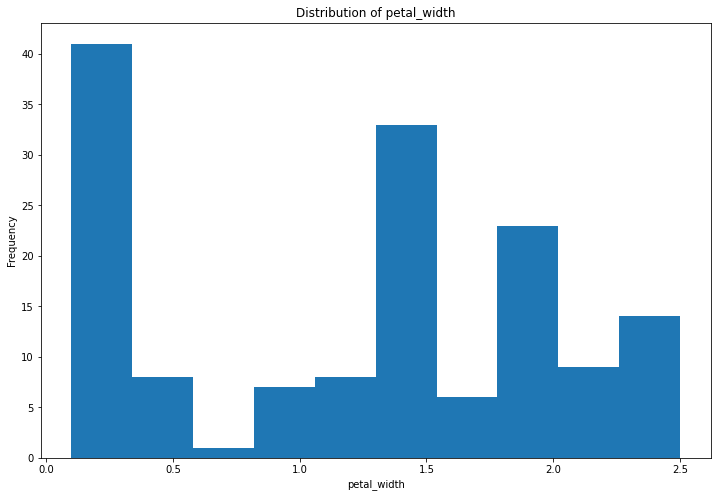

In [28]:
#Histogram for petal_width
plt.hist(data['petal_width'], bins=10)

# add a title and axis labels
plt.title("Distribution of petal_width")
plt.xlabel("petal_width")
plt.ylabel("Frequency")

# display the plot
plt.show()

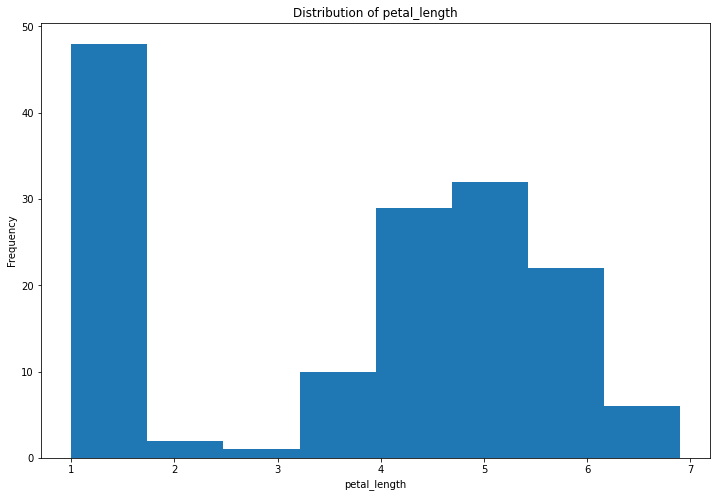

In [29]:
# Histogram for petal_length
plt.hist(data['petal_length'],bins = 8)

# add a title and axis labels
plt.title("Distribution of petal_length")
plt.xlabel("petal_length")
plt.ylabel("Frequency")

# display the plot
plt.show()

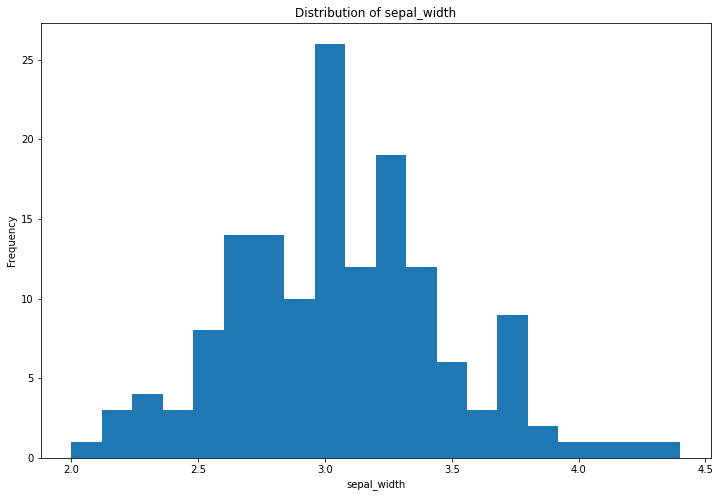

In [30]:
#Histogram for sepal_width
plt.hist(data['sepal_width'], bins=20)

# add a title and axis labels
plt.title("Distribution of sepal_width")
plt.xlabel("sepal_width")
plt.ylabel("Frequency")

# display the plot
plt.show()

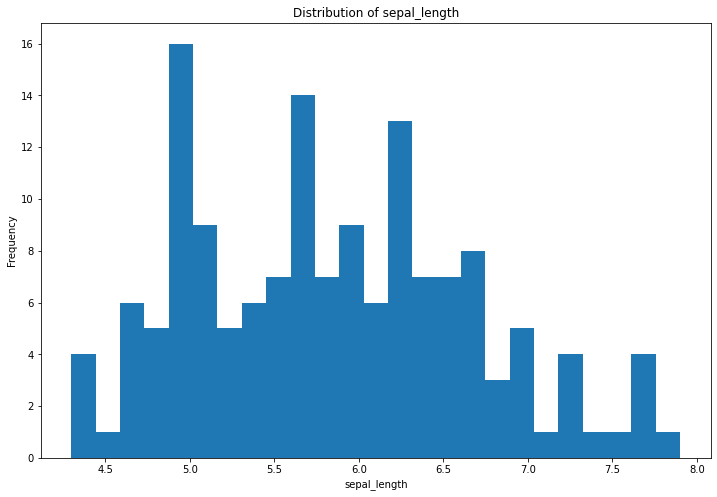

In [31]:
#Histogram for sepal_length
plt.hist(data['sepal_length'], bins=25)

# add a title and axis labels
plt.title("Distribution of sepal_length")
plt.xlabel("sepal_length")
plt.ylabel("Frequency")

# display the plot
plt.show()

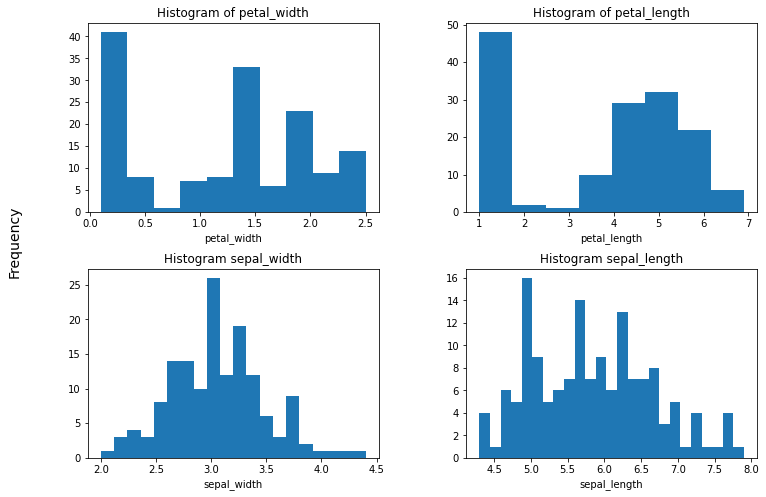

In [32]:
#Now plot them together using  subplot
# create a figure with a 2x2 subplot layout
fig, axs = plt.subplots(2, 2)

# create a histogram for each subplot
axs[0, 0].hist(data['petal_width'], bins=10)
axs[0, 1].hist(data['petal_length'], bins=8)
axs[1, 0].hist(data['sepal_width'], bins=20)
axs[1, 1].hist(data['sepal_length'], bins=25)

# add titles and axis labels to each subplot
axs[0, 0].set_title('Histogram of petal_width')
axs[0, 1].set_title('Histogram of petal_length')
axs[1, 0].set_title('Histogram sepal_width')
axs[1, 1].set_title('Histogram sepal_length')

#Set ylabel for all the plots in a single line
fig.text(0.04, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=14)

axs[0, 0].set_xlabel('petal_width')
axs[0, 1].set_xlabel('petal_length')

axs[1, 0].set_xlabel('sepal_width')

axs[1, 1].set_xlabel('sepal_length')


# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# display the plot
plt.show()

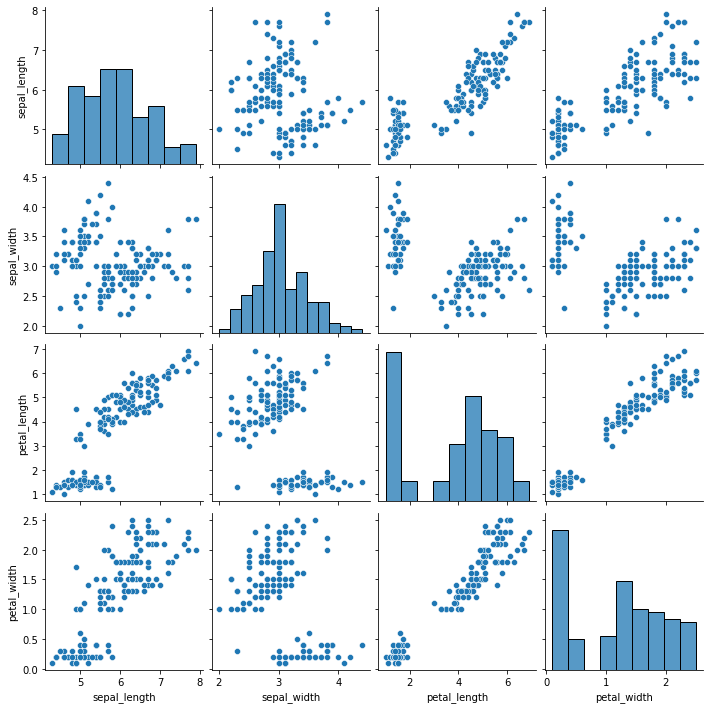

In [33]:
#Or we can easily plot 4 histogram using seaborn library
# plot a grid of histograms for all features
sns.pairplot(data, diag_kind="hist")

# show the plot
plt.show()

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

<AxesSubplot:>

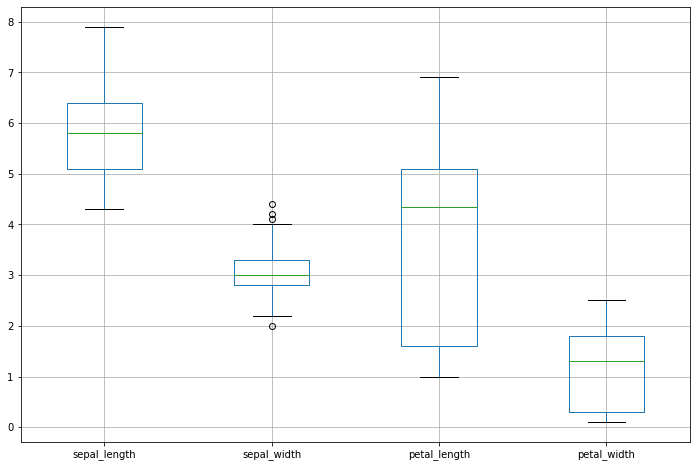

In [34]:
data.boxplot()
#this plot is generated by pandas

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

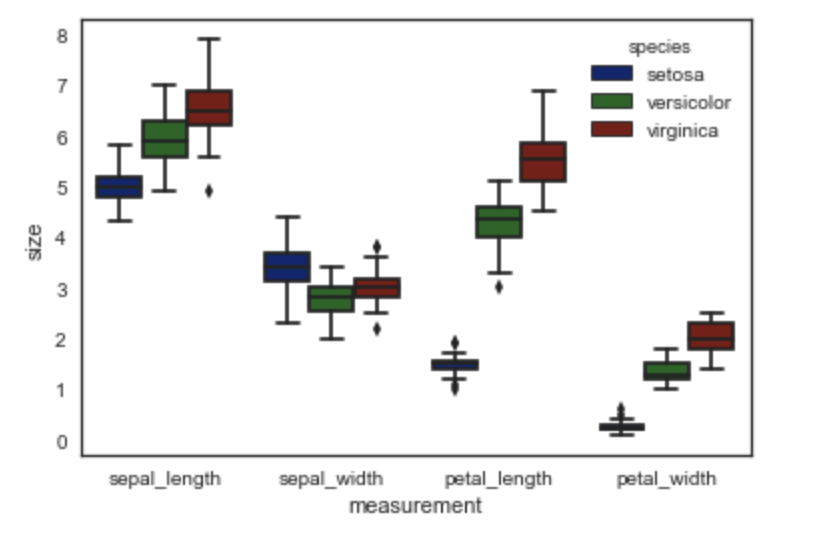

In [35]:
#first unpivot the data using pandas stack() methos
stacked_df = data.set_index(['species']).stack().reset_index()
stacked_df.columns = ['species', 'measurements', 'size']
stacked_df

,species,measurements,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


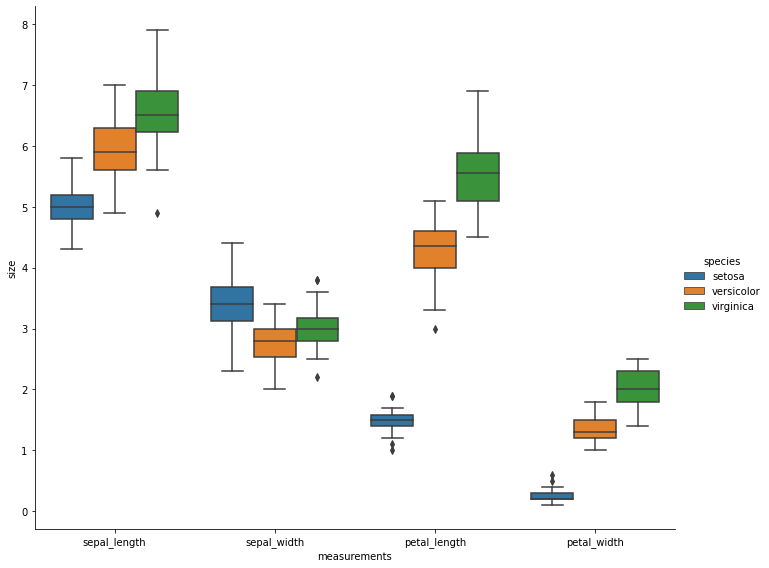

In [36]:
#Now plot the required plot using seaborn

sns.catplot(x="measurements", y="size", kind="box", 
            data = stacked_df, hue='species',height=8, aspect=1.2
            )
plt.show()

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

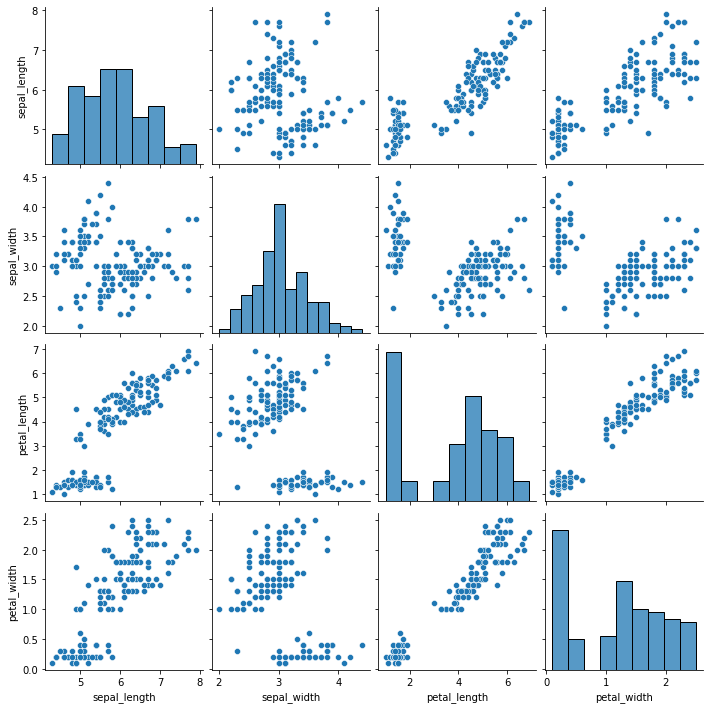

In [37]:
#make a pairplot using seaborn
sns.pairplot(data)
plt.show()

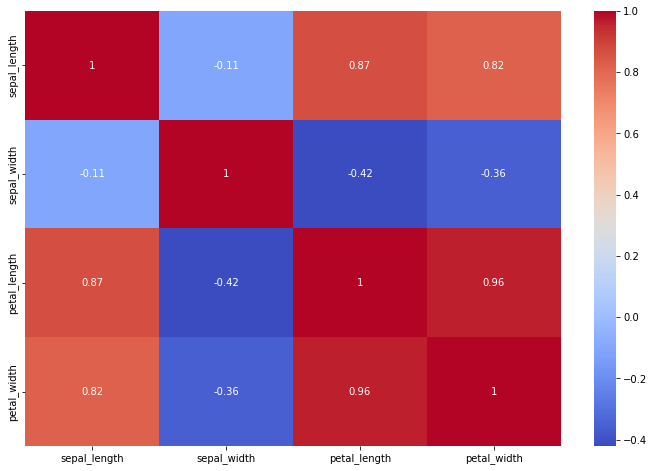

In [38]:
#To check correlation we can plot a heatmap

# calculate the correlation matrix
corr_matrix = data.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()